# VND Banknotes Classifer

<img src='https://hochiminhcityhighlights.com/wp-content/uploads/2014/05/Vietnames-Dong-500-000-to-10-000.jpg' width=600>

## Build the dataset

In [ ]:
# Mount Google drive locally
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import os
import pathlib
import glob
import shutil
import PIL
import random
import cv2
import pickle

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.layers import Flatten, GlobalAveragePooling2D, Dropout, Dense, Input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
# from tensorflow.keras.applications import InceptionV3
# from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
import sklearn.model_selection

In [ ]:
# Unzip
!unzip -q /content/gdrive/MyDrive/VND_Banknotes_dataset.zip -d /content/sample_data/vnd_notes
!unzip -q /content/gdrive/MyDrive/First_Project_VND_dataset.zip -d /content/sample_data/vnd_notes

1000/Giấy_bạc_1000_đồng.jpg:  mismatching "local" filename (1000/Giс║еy_bс║бc_1000_─Сс╗Уng.jpg),
         continuing with "central" filename version
1000/Đồng_bạc_1000_đồng (1).jpeg:  mismatching "local" filename (1000/─Рс╗Уng_bс║бc_1000_─Сс╗Уng (1).jpeg),
         continuing with "central" filename version
1000/Đồng_bạc_1000_đồng.jpeg:  mismatching "local" filename (1000/─Рс╗Уng_bс║бc_1000_─Сс╗Уng.jpeg),
         continuing with "central" filename version
20000/Đồng_bạc_20.000.jpg:  mismatching "local" filename (20000/─Рс╗Уng_bс║бc_20.000.jpg),
         continuing with "central" filename version


In [ ]:
BASED_PATH = pathlib.Path('../content/sample_data/vnd_notes')
BASED_PATH_STR = '/content/sample_data/vnd_notes'

In [ ]:
label_names = sorted(item.name for item in BASED_PATH.glob('*') if item.is_dir())
label_names

['1000',
 '10000',
 '100000',
 '2000',
 '20000',
 '200000',
 '500',
 '5000',
 '50000',
 '500000']

In [ ]:
label_length = []
for i in range(len(label_names)):
    label_set = []
    for j in glob.glob('/content/sample_data/vnd_notes/' + label_names[i] + '/*'):
        label_set.append(j)
    label_length.append(len(label_set))

print(label_length)

[939, 1020, 919, 1061, 1065, 1085, 850, 1125, 695, 1070]


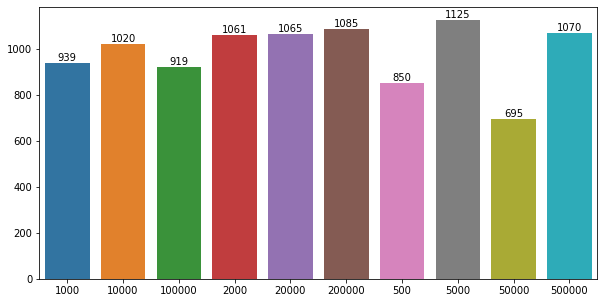

In [ ]:
plt.figure(figsize=(10, 5))

chart_obj = sns.barplot(x=label_names, y=label_length)
for bar in chart_obj.patches:
    chart_obj.annotate("%.0f" % bar.get_height(), (bar.get_x() + bar.get_width() / 2., bar.get_height()+1),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

In [ ]:
BASED_PATH = pathlib.Path('../content/sample_data/vnd_notes')
BASED_PATH_STR = '../content/sample_data/vnd_notes'

In [ ]:
os.mkdir('../content/sample_data/vnd_data')

In [ ]:
def data_dir_creator(lst_folder_name, based_path):
    for value_path in range(len(lst_folder_name)):
        dir_name = lst_folder_name[value_path]
        folder_dir = f'{based_path}/{dir_name}'
        os.mkdir(folder_dir)

In [ ]:
CURRENT_PATH = pathlib.Path('/content/sample_data/vnd_data')
CURRENT_PATH_STR = '../content/sample_data/vnd_data'

In [ ]:
train_val_list = ['train', 'val']
data_dir_creator(train_val_list, CURRENT_PATH_STR)

In [ ]:
train_dir_str = '../content/sample_data/vnd_data/train'
val_dir_str = '../content/sample_data/vnd_data/val'
data_dir_creator(label_names, train_dir_str)
data_dir_creator(label_names, val_dir_str)

In [ ]:
def add_data(label, val_size = 0.2):
    path_list = []
    for image_path in glob.glob('/content/sample_data/vnd_notes/'+ label + '/*'):
        path_list.append(image_path)
    for index in range(len(path_list)):
        if index < (len(path_list) * val_size):
            shutil.copy(path_list[index], '/content/sample_data/vnd_data/val/'+ label)
        else:
            shutil.copy(path_list[index], '/content/sample_data/vnd_data/train/'+ label)
    print(path_list)

In [ ]:
for folder_label in range(len(label_names)):
    add_data(label_names[folder_label])
    train = '/content/sample_data/vnd_data/train/'+ label_names[folder_label] + '/*'
    validation = '/content/sample_data/vnd_data/val/'+ label_names[folder_label] + '/*'
    print(f'Train ' + str(label_names[folder_label]) + ' set: ' + str(len(glob.glob(train))) + ' files.',
          f'Validation ' + str(label_names[folder_label]) + ' set: ' + str(len(glob.glob(validation))) + ' files.',
          f'Total: ' + str(len(glob.glob(train))+len(glob.glob(validation))) + ' files.',
          sep='\n')

['/content/sample_data/vnd_notes/1000/WIN_20210918_15_27_23_Pro.jpg', '/content/sample_data/vnd_notes/1000/WIN_20210918_15_26_39_Pro.jpg', '/content/sample_data/vnd_notes/1000/WIN_20210918_18_58_26_Pro.jpg', '/content/sample_data/vnd_notes/1000/WIN_20210918_14_51_57_Pro.jpg', '/content/sample_data/vnd_notes/1000/WIN_20210918_15_06_24_Pro.jpg', '/content/sample_data/vnd_notes/1000/WIN_20210918_18_58_38_Pro (2).jpg', '/content/sample_data/vnd_notes/1000/WIN_20210918_18_59_21_Pro.jpg', '/content/sample_data/vnd_notes/1000/WIN_20210918_14_50_05_Pro.jpg', '/content/sample_data/vnd_notes/1000/WIN_20210918_19_03_29_Pro.jpg', '/content/sample_data/vnd_notes/1000/WIN_20210918_14_52_24_Pro.jpg', '/content/sample_data/vnd_notes/1000/WIN_20210918_14_59_53_Pro.jpg', '/content/sample_data/vnd_notes/1000/WIN_20210918_15_04_16_Pro.jpg', '/content/sample_data/vnd_notes/1000/Đồng_bạc_1000_đồng (1).jpeg', '/content/sample_data/vnd_notes/1000/WIN_20210918_18_58_55_Pro.jpg', '/content/sample_data/vnd_notes

In [ ]:
# Plot some sample images
sample_1 = PIL.Image.open((glob.glob('/content/sample_data/vnd_notes/*/*')[1000]))
# sample_2 = PIL.Image.open((glob.glob('/content/sample_data/vnd_data/train/5000/*')[4]))
# sample_3 = PIL.Image.open((glob.glob('/content/sample_data/vnd_data/train/200000/*')[9]))
# sample_4 = PIL.Image.open((glob.glob('/content/sample_data/vnd_data/train/500/*')[2]))
fig, ax = plt.subplots(1, 4, figsize=(15,5))
ax[0].imshow(sample_1, cmap='gray')
# ax[1].imshow(sample_2, cmap='gray')
# ax[2].imshow(sample_3, cmap='gray')
# ax[3].imshow(sample_4, cmap='gray')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

#MODEL

In [ ]:
def get_model():
    based_model = MobileNetV2(weights='imagenet',
                              input_shape=(224, 224, 3),
                              include_top=False)

    # Freeze the layers
    for layer in based_model.layers:
        layer.trainable = False

    # Create model
    inputs = Input(shape=(224, 224, 3))
    x = preprocess_input(inputs)
    x = based_model(x, training=False)
    x = GlobalAveragePooling2D()(x)
    # x = Dense(4096, activation='relu')(x)
    # x = Dropout(0.2)(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(10, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    
    return model

In [ ]:
model = get_model()
model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1311744   
________________________________________________________________

In [ ]:
# construct the training image generator for data augmentation
train_datagene = ImageDataGenerator(rotation_range=20,
                                    # zoom_range=0.1,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    brightness_range=[0.2,1.5],
                                    shear_range=0.2,
                                    fill_mode="nearest")

val_datagene = ImageDataGenerator()

train_generator = train_datagene.flow_from_directory('/content/sample_data/vnd_data/train',
                                                     target_size=(224, 224),
                                                     batch_size=32,
                                                     shuffle=True,
                                                     class_mode='categorical')

val_generator = val_datagene.flow_from_directory('/content/sample_data/vnd_data/val',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 shuffle=False,
                                                 class_mode='categorical')

Found 7844 images belonging to 10 classes.
Found 1963 images belonging to 10 classes.


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0.1,
                               patience=5,
                               verbose=2,
                               restore_best_weights=True)

file_path = '/content/gdrive/MyDrive/VND_NOTES/{epoch:02d}-{val_accuracy:.2f}.hdf5'
checkpoint = ModelCheckpoint(file_path, monitor='val_loss', verbose=1, save_best_only=True, mode='max')

# callbacks_list = [checkpoint]
callbacks_list = [early_stopping, checkpoint]

In [ ]:
init_epochs = 20
history = model.fit(train_generator, 
                    validation_data=val_generator,
                    epochs=init_epochs,
                    callbacks=callbacks_list)

Epoch 1/20
246/246 [==============================] - 1177s 5s/step - loss: 0.7046 - accuracy: 0.7594 - val_loss: 0.4251 - val_accuracy: 0.8523

Epoch 00001: val_loss improved from -inf to 0.42505, saving model to /content/gdrive/MyDrive/VND_NOTES/01-0.85.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
246/246 [==============================] - 1160s 5s/step - loss: 0.3575 - accuracy: 0.8758 - val_loss: 0.2092 - val_accuracy: 0.9302

Epoch 00002: val_loss did not improve from 0.42505
Epoch 3/20
246/246 [==============================] - 1150s 5s/step - loss: 0.3071 - accuracy: 0.8928 - val_loss: 0.2002 - val_accuracy: 0.9292

Epoch 00003: val_loss did not improve from 0.42505
Epoch 4/20
246/246 [==============================] - 1158s 5s/step - loss: 0.2496 - accuracy: 0.9109 - val_loss: 0.1451 - val_accuracy: 0.9496

Epoch 00004: val_loss did not improve from 0.42505
Epoch 5/20
246/246 [==============================] - 1152s 5s/step - loss: 0.2490 - accuracy: 0.9146 - val_loss: 0.1940 - val_accuracy: 0.9333

Epoch 00005: val_loss did not improve from 0.42505
Epoch 6/20
246/246 [==============================] - 1159s 5s/step - loss: 0.2184 - accuracy: 0.9266 - val_loss: 0.1059 - val_accuracy: 0.9623

Epoch 00006: val_loss did not improve from 0.42505
Epoch 7/20
246/246 [

In [ ]:
model.evaluate(val_generator)

62/62 [==============================] - 195s 3s/step - loss: 0.1059 - accuracy: 0.9623


[0.10594767332077026, 0.9623026251792908]

In [ ]:
model.save('/content/gdrive/MyDrive/VND_NOTES/based_model.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


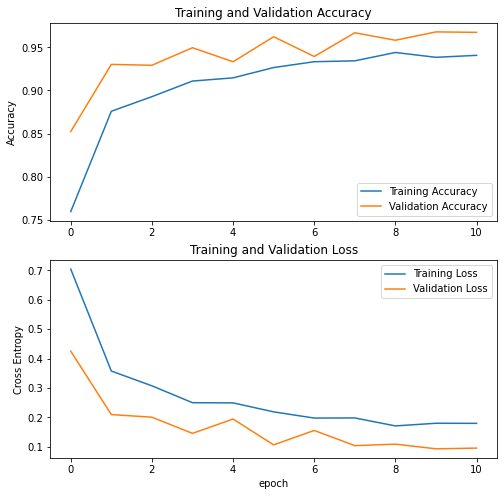

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
# plt.ylim([0,1.0])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
based_model = MobileNetV2(weights='imagenet',
                          input_shape=(224, 224, 3),
                          include_top=False)

# Number of layers in based model
print("Number of layers in the base model: ", len(based_model.layers))

Number of layers in the base model:  154


In [ ]:
# Unfreeze the base_model.
based_model.trainable = True

# Fine-tune from this layer onwards
fine_tune_at = 150

# Freeze all the layers before the `fine_tune_at` layer
for layer in based_model.layers[:fine_tune_at]:
  layer.trainable =  False

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), # default 0.001
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1311744   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0     

In [ ]:
from keras.callbacks import ModelCheckpoint

callbacks = [EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
             ModelCheckpoint(monitor='val_loss', filepath='/content/gdrive/MyDrive/VND_NOTES/01-0.90.hdf5', save_weights_only=False, save_best_only=True, verbose=1)]

init_epochs = 10
fine_tune_epochs = 10
total_epochs = init_epochs + fine_tune_epochs

history_fine = model.fit(train_generator, 
                         validation_data=val_generator,
                         epochs=total_epochs,
                         initial_epoch=init_epochs,
                         callbacks=callbacks)

model.save('/content/gdrive/MyDrive/VND_NOTES/tuned_model.h5')

Epoch 11/20
246/246 [==============================] - 1178s 5s/step - loss: 0.1092 - accuracy: 0.9644 - val_loss: 0.0868 - val_accuracy: 0.9720

Epoch 00011: val_loss improved from inf to 0.08683, saving model to /content/gdrive/MyDrive/VND_NOTES/01-0.90.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 12/20
246/246 [==============================] - 1130s 5s/step - loss: 0.0891 - accuracy: 0.9695 - val_loss: 0.0717 - val_accuracy: 0.9745

Epoch 00012: val_loss improved from 0.08683 to 0.07175, saving model to /content/gdrive/MyDrive/VND_NOTES/01-0.90.hdf5
Epoch 13/20
246/246 [==============================] - 1120s 5s/step - loss: 0.0841 - accuracy: 0.9699 - val_loss: 0.0696 - val_accuracy: 0.9761

Epoch 00013: val_loss improved from 0.07175 to 0.06964, saving model to /content/gdrive/MyDrive/VND_NOTES/01-0.90.hdf5
Epoch 14/20
246/246 [==============================] - 1114s 5s/step - loss: 0.0802 - accuracy: 0.9748 - val_loss: 0.0690 - val_accuracy: 0.9796

Epoch 00014: val_loss improved from 0.06964 to 0.06903, saving model to /content/gdrive/MyDrive/VND_NOTES/01-0.90.hdf5
Epoch 15/20
246/246 [==============================] - 1111s 5s/step - loss: 0.0776 - accuracy: 0.9744 - val_loss: 0.0722 - val_accuracy: 0.9786

Epoch 00015: val_loss did not improve from 0.06903
Epoch 16

In [ ]:
model.evaluate(val_generator)

62/62 [==============================] - 184s 3s/step - loss: 0.0599 - accuracy: 0.9791


[0.05993546545505524, 0.9791135787963867]

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

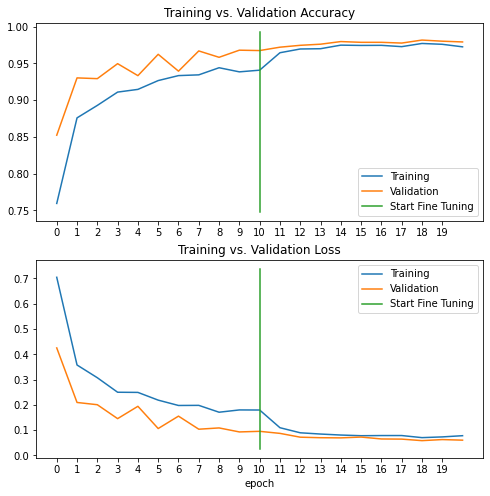

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training')
plt.plot(val_acc, label='Validation')
plt.xticks(range(total_epochs))
# plt.ylim([0.9, 1])
plt.plot([init_epochs,init_epochs],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training vs. Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training')
plt.plot(val_loss, label='Validation')
plt.xticks(range(total_epochs))
# plt.ylim([0, 0.5])
plt.plot([init_epochs,init_epochs],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training vs. Validation Loss')
plt.xlabel('epoch')
plt.show()

## Load model

In [ ]:
model = keras.models.load_model('/content/gdrive/MyDrive/VND_NOTES/tuned_model.h5')
model.summary()

## Predict a real image

Let's drag and drop a photo to your Colab folder and update the file name below.

In [ ]:
# UPLOAD A PHOTO and PREDICT
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print(fn)
  img_path = './' + fn

Saving WIN_20210923_17_21_45_Pro.jpg to WIN_20210923_17_21_45_Pro.jpg
WIN_20210923_17_21_45_Pro.jpg


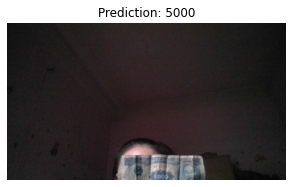

In [ ]:
img        = image.load_img(img_path, target_size=(224, 224))
img_array  = image.img_to_array(img)
img_array  = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

for key, value in val_generator.class_indices.items():
  if value == prediction[0].argmax():
    pred = key

plt.figure(figsize=(5,5))
img = mpimg.imread(img_path)
plt.imshow(img)
plt.title('Prediction: ' + pred.upper())
plt.axis('off')
plt.grid(b=None)
plt.show()

#Model Evaluation

In [ ]:
val_generator.class_indices

{'1000': 0,
 '10000': 1,
 '100000': 2,
 '2000': 3,
 '20000': 4,
 '200000': 5,
 '500': 6,
 '5000': 7,
 '50000': 8,
 '500000': 9}

In [ ]:
predictions = model.predict(val_generator)

In [ ]:
predictions[0]

array([9.9985182e-01, 6.1711873e-08, 4.1356703e-08, 4.7304366e-06,
       8.0666467e-07, 4.5412331e-13, 1.2307170e-14, 1.4245331e-04,
       9.1889141e-10, 1.1811989e-10], dtype=float32)

In [ ]:
ground_truth = val_generator.classes
ground_truth

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [ ]:
pred_indices = np.argmax(predictions,axis=1)

In [ ]:
val_dir = pathlib.Path('../content/VND/vnd_data/val')

In [ ]:
filenames = val_generator.filenames
img_paths = list(map(lambda x: str(val_dir/x), filenames))  # Full path

ground_truth[:5] , img_paths[:5]

(array([0, 0, 0, 0, 0], dtype=int32),
 ['../content/VND/vnd_data/val/1000/2019_08_28_12_04_IMG_0060.JPG',
  '../content/VND/vnd_data/val/1000/2019_08_28_12_04_IMG_0064.JPG',
  '../content/VND/vnd_data/val/1000/2019_08_28_12_05_IMG_0068.JPG',
  '../content/VND/vnd_data/val/1000/2019_08_28_12_05_IMG_0077.JPG',
  '../content/VND/vnd_data/val/1000/2019_08_28_12_06_IMG_0087.JPG'])

In [ ]:
predictions[0]

array([9.9985182e-01, 6.1711873e-08, 4.1356703e-08, 4.7304366e-06,
       8.0666467e-07, 4.5412331e-13, 1.2307170e-14, 1.4245331e-04,
       9.1889141e-10, 1.1811989e-10], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ground_truth, pred_indices, target_names=list(val_generator.class_indices.keys())))

              precision    recall  f1-score   support

        1000       0.99      0.97      0.98       185
       10000       0.98      0.94      0.96       203
      100000       0.98      0.97      0.97       184
        2000       0.97      0.99      0.98       213
       20000       0.97      0.99      0.98       213
      200000       0.96      0.99      0.98       217
         500       1.00      1.00      1.00       170
        5000       0.99      0.98      0.98       225
       50000       0.97      0.99      0.98       139
      500000       0.99      0.99      0.99       214

    accuracy                           0.98      1963
   macro avg       0.98      0.98      0.98      1963
weighted avg       0.98      0.98      0.98      1963



#PREDICT

In [ ]:
# # prediction_table is a dict with index, prediction, ground truth
# prediction_table = {}
# for index, val in enumerate(predictions):
#     # get argmax index
#     index_of_highest_probability = np.argmax(val)
#     value_of_highest_probability = val[index_of_highest_probability]
#     prediction_table[index] = [value_of_highest_probability, 
#                                index_of_highest_probability, 
#                                ground_truth[index]]
# assert len(predictions) == len(ground_truth) == len(prediction_table)


In [ ]:
# def get_images_with_sorted_probabilities(prediction_table,
#                                          get_highest_probability,
#                                          label,
#                                          number_of_items,
#                                          only_false_predictions=False):
#     sorted_prediction_table = [(k, prediction_table[k])
#                                for k in sorted(prediction_table,
#                                                key=prediction_table.get,
#                                                reverse=get_highest_probability)
#                                ]
#     result = []
#     for index, key in enumerate(sorted_prediction_table):
#         image_index, [probability, predicted_index, gt] = key
#         if predicted_index == label:
#             if only_false_predictions == True:
#                 if predicted_index != gt:
#                     result.append(
#                         [image_index, [probability, predicted_index, gt]])
#             else:
#                 result.append(
#                     [image_index, [probability, predicted_index, gt]])
#     return result[:number_of_items]

# def plot_images(filenames, distances, message):
#     images = []
#     for filename in filenames:
#         images.append(mpimg.imread(filename))
#     plt.figure(figsize=(20, 15))
#     columns = 5
#     for i, image in enumerate(images):
#         ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
#         ax.set_title("\n\n" + filenames[i].split("/")[-1] + "\n" +
#                      "\nProbability: " +
#                      str(float("{0:.2f}".format(distances[i]))))
#         plt.suptitle(message, fontsize=20, fontweight='bold')
#         plt.axis('off')
#         plt.imshow(image)
        
# def display(sorted_indices, message):
#     similar_image_paths = []
#     distances = []
#     for name, value in sorted_indices:
#         [probability, predicted_index, gt] = value
#         similar_image_paths.append(str(val_dir) + '/' + filenames[name])
#         distances.append(probability)
#     plot_images(similar_image_paths, distances, message)

In [ ]:
# message = 'HIGH Confidence of 1000'
# highest_confident_1000_images = get_images_with_sorted_probabilities(prediction_table, True, 0, 10, False)
# display(highest_confident_1000_images, message)

In [ ]:
# message = 'LOW Confidence of 1000'
# lowest_confident_1000_images = get_images_with_sorted_probabilities(prediction_table, False, 0, 10, False)
# display(lowest_confident_1000_images, message)

In [ ]:
# message = 'HIGH Confidence of 500000'
# highest_confident_500000_images = get_images_with_sorted_probabilities(prediction_table, True, 9, 10, False)
# display(highest_confident_500000_images, message)

In [ ]:
# message = 'LOW Confidence of 500000'
# lowest_confident_500000_images = get_images_with_sorted_probabilities(prediction_table, False, 9, 10, False)
# display(lowest_confident_500000_images, message)

In [ ]:
# incorrect_1000_images = get_images_with_sorted_probabilities(prediction_table, True, 0, 10, True)
# message = 'Images of 1000 with highest probability of containing others'
# display(incorrect_1000_images, message)

In [ ]:
# message = 'Images of 500000 with highest probability of containing others'
# incorrect_500000_images = get_images_with_sorted_probabilities(prediction_table, True, 9, 10, True)
# display(incorrect_500000_images, message)

#GradCam

In [ ]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, 224))

# Make model
model = model_builder(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [ ]:
# plotting functions
def get_img_array(img_path, img_size):
    # `img` is a PIL image
    img = tensorflow.keras.preprocessing.image.load_img(img_path, target_size=(img_size,img_size)) # load and resize
    array = tensorflow.keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    # array = preprocess_input(array)     # comment this line if model includes a preprocessing layer
    return array

def plot_image_with_pred(img_path, model, labels, img_size=224):
    # display part
    img = PIL.Image.open(img_path)
    img = img.resize((img_size,img_size))   # resize to mimic model's input
    img = np.array(img)
    plt.imshow(img)
    # prediction part
    img_array = get_img_array(img_path, img_size)
    preds = model.predict(img_array)
    plt.title(f'Prediction: {labels[preds.argmax(axis=1)[0]]}, with {round(preds.max()*100,2)}%')
    return img_array

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, classifier_layer_names, base_model_idx, pretrained=True):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    if pretrained:
        last_conv_layer = model.layers[base_model_idx].get_layer(last_conv_layer_name)
        last_conv_layer_model = keras.Model(model.layers[base_model_idx].inputs, last_conv_layer.output)
    else:
        last_conv_layer = model.get_layer(last_conv_layer_name)
        last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

        
    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    
    for layer_name in classifier_layer_names:
      try:
          x = model.get_layer(layer_name)(x)
      except:
          x = model.layers[base_model_idx].get_layer(layer_name)(x)  
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index] # the f function

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

# We load the original image
def plot_with_heatmap(img_path, heatmap, img_size=224):
    img = keras.preprocessing.image.load_img(img_path, target_size=(img_size, img_size))
    img = keras.preprocessing.image.img_to_array(img)

    # We rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # We use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # We use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # We create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap  + img*0.6
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    
    fig, axes = plt.subplots(2, 1, figsize=(10,10))
    step = img_size//7
    axes[0].set_xticks([x*step for x in range(1,7)])
    axes[0].set_yticks([x*step for x in range(1,7)])
    axes[0].imshow(jet_heatmap.astype(int))
    axes[1].set_xticks([x*step for x in range(1,7)])
    axes[0].set_yticks([x*step for x in range(1,7)])
    axes[1].imshow(superimposed_img)
    

In [ ]:
# # IMPORTANT
# base_model_idx = 1
# last_conv_idx = -3

# last_conv_layer_name = model.layers[base_model_idx].layers[last_conv_idx].name # destination layer
# the_rest_names = [i.name for i in model.layers[base_model_idx].layers[last_conv_idx+1:]] + [j.name for j in model.layers[2:]]

# # CHECK
# print(last_conv_layer_name, '\n')
# print(the_rest_names)

In [ ]:
def display_everything(path, last_conv_layer_name, the_rest_names, base_model_idx):
  img_path = Path(path)
  
  img_array = plot_image_with_pred(img_path, model,labels=list(train_generator.class_indices.keys()))
  
  heatmap = make_gradcam_heatmap(img_array, model, 
                                last_conv_layer_name, 
                                the_rest_names,
                                base_model_idx)
  
  plot_with_heatmap(img_path,heatmap)

In [ ]:
wrong_pred_paths = np.array(img_paths)[(pred_indices != ground_truth)]

print("Total wrong predictions:", len(wrong_pred_paths), '\n')
wrong_pred_paths

Total wrong predictions: 41 



array(['../content/VND/vnd_data/val/1000/2019_08_28_12_08_IMG_0108.JPG',
       '../content/VND/vnd_data/val/1000/WIN_20210918_14_53_40_Pro.jpg',
       '../content/VND/vnd_data/val/1000/WIN_20210918_14_56_22_Pro.jpg',
       '../content/VND/vnd_data/val/1000/WIN_20210918_14_57_49_Pro.jpg',
       '../content/VND/vnd_data/val/1000/WIN_20210918_14_58_31_Pro.jpg',
       '../content/VND/vnd_data/val/1000/WIN_20210918_15_00_25_Pro.jpg',
       '../content/VND/vnd_data/val/10000/10K.25.jpg',
       '../content/VND/vnd_data/val/10000/10K.71.jpg',
       '../content/VND/vnd_data/val/10000/WIN_20210918_15_30_47_Pro.jpg',
       '../content/VND/vnd_data/val/10000/WIN_20210918_15_34_30_Pro.jpg',
       '../content/VND/vnd_data/val/10000/WIN_20210918_15_34_48_Pro.jpg',
       '../content/VND/vnd_data/val/10000/WIN_20210918_15_35_06_Pro.jpg',
       '../content/VND/vnd_data/val/10000/WIN_20210918_15_36_09_Pro.jpg',
       '../content/VND/vnd_data/val/10000/WIN_20210918_15_44_30_Pro.jpg',
       '

In [ ]:
def plot_images(img_paths, message, img_size=224):
    plt.figure(figsize=(20, 20))
    columns = 4
    for i, img_path in enumerate(img_paths):
        # predict
        img_array = get_img_array(img_path, img_size)
        predictions = model.predict(img_array)

        # setup
        ax = plt.subplot(len(img_paths) / columns + 1, columns, i + 1)
        ax.set_title(img_paths[i].split("/")[-1] + "\n" +
                     "\nProbability: " + str(float("{0:.1f}".format(predictions.max()*100))))
        plt.suptitle(message, fontsize=20, fontweight='bold')
        plt.axis('off')
        
        # show
        img = PIL.Image.open(img_path)
        img = np.array(img)
        plt.imshow(img)

In [ ]:
# plot_images(wrong_pred_paths, "Wrong predictions")

In [ ]:
# heatmap = display_everything(wrong_pred_paths[9], last_conv_layer_name, the_rest_names, base_model_idx)